# Survivability of Hepatitis
## DTSA 5509 Final Project Workbook

### Thesis
Using data from the UCI Machine Learning Repository, I am trying to show that many of the features listed in the dataset can be used to predict the survivability of a hepatitis infection. The dataset provides real world measurements of various factors associated with the infection, including antiviral applications, measurements of organs, measurments of other chemicals in the patients body. Using these features, I intend to train a model to be able to label an infection as survivable. 

### Data Collection
The UCI repository has developed their own library to be able to simplify the sharing of data in a python environment. I started by installing and importing the library. I was then abo=le to import the specific dataset and verify the import. 

In [1]:
%pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [2]:
#Use UCI Libraries to import dataset
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
hepatitis = fetch_ucirepo(id=46) 
  
# data (as pandas dataframes) 
X = hepatitis.data.features 
y = hepatitis.data.targets 

In [3]:
# metadata 
print(hepatitis.metadata) 
  
# variable information 
print(hepatitis.variables) 

{'uci_id': 46, 'name': 'Hepatitis', 'repository_url': 'https://archive.ics.uci.edu/dataset/46/hepatitis', 'data_url': 'https://archive.ics.uci.edu/static/public/46/data.csv', 'abstract': 'From G.Gong: CMU; Mostly Boolean or numeric-valued attribute types; Includes cost data (donated by Peter Turney)', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 155, 'num_features': 19, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1983, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5Q59J', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': 'Please ask Gail Gong for further information on this database.', 'purpose': None, 'funded_by': None, 'instances_represent': None, 'recommended_data_splits': None, 'sensitive_data': None, 'preprocessing_descri

### Data Analysis and cleaning
I started by evaluating the potential values of each feature. The majority seemed to be binary classifications. Once I was able to evaluate that, I began cleaning up any missing values. I started by dropping the data from any feature that had 5 or fewer Na values. For the other features, i took the mean for cate3gorical variables and the median for numeric variables. I have concerns over dropping this many rows and leaving me with a very small dataset.

In [4]:
#variable values
print(hepatitis.metadata.additional_info.variable_info)

     1. Class: DIE, LIVE
     2. AGE: 10, 20, 30, 40, 50, 60, 70, 80
     3. SEX: male, female
     4. STEROID: no, yes
     5. ANTIVIRALS: no, yes
     6. FATIGUE: no, yes
     7. MALAISE: no, yes
     8. ANOREXIA: no, yes
     9. LIVER BIG: no, yes
    10. LIVER FIRM: no, yes
    11. SPLEEN PALPABLE: no, yes
    12. SPIDERS: no, yes
    13. ASCITES: no, yes
    14. VARICES: no, yes
    15. BILIRUBIN: 0.39, 0.80, 1.20, 2.00, 3.00, 4.00
        -- see the note below
    16. ALK PHOSPHATE: 33, 80, 120, 160, 200, 250
    17. SGOT: 13, 100, 200, 300, 400, 500, 
    18. ALBUMIN: 2.1, 3.0, 3.8, 4.5, 5.0, 6.0
    19. PROTIME: 10, 20, 30, 40, 50, 60, 70, 80, 90
    20. HISTOLOGY: no, yes

The BILIRUBIN attribute appears to be continuously-valued.  I checked this with the donater, Bojan Cestnik, who replied:

 About the hepatitis database and BILIRUBIN problem I would like to say the following: BILIRUBIN is continuous attribute (= the number of it's "values" in the ASDOHEPA.DAT file is negativ

In [5]:
import numpy as np
import pandas as pd

In [6]:
df = hepatitis.data.original
print(df.isna().sum())
print(df.shape)

Class               0
Age                 0
Sex                 0
Steroid             1
Antivirals          0
Fatigue             1
Malaise             1
Anorexia            1
Liver Big          10
Liver Firm         11
Spleen Palpable     5
Spiders             5
Ascites             5
Varices             5
Bilirubin           6
Alk Phosphate      29
Sgot                4
Albumin            16
Protime            67
Histology           0
dtype: int64
(155, 20)


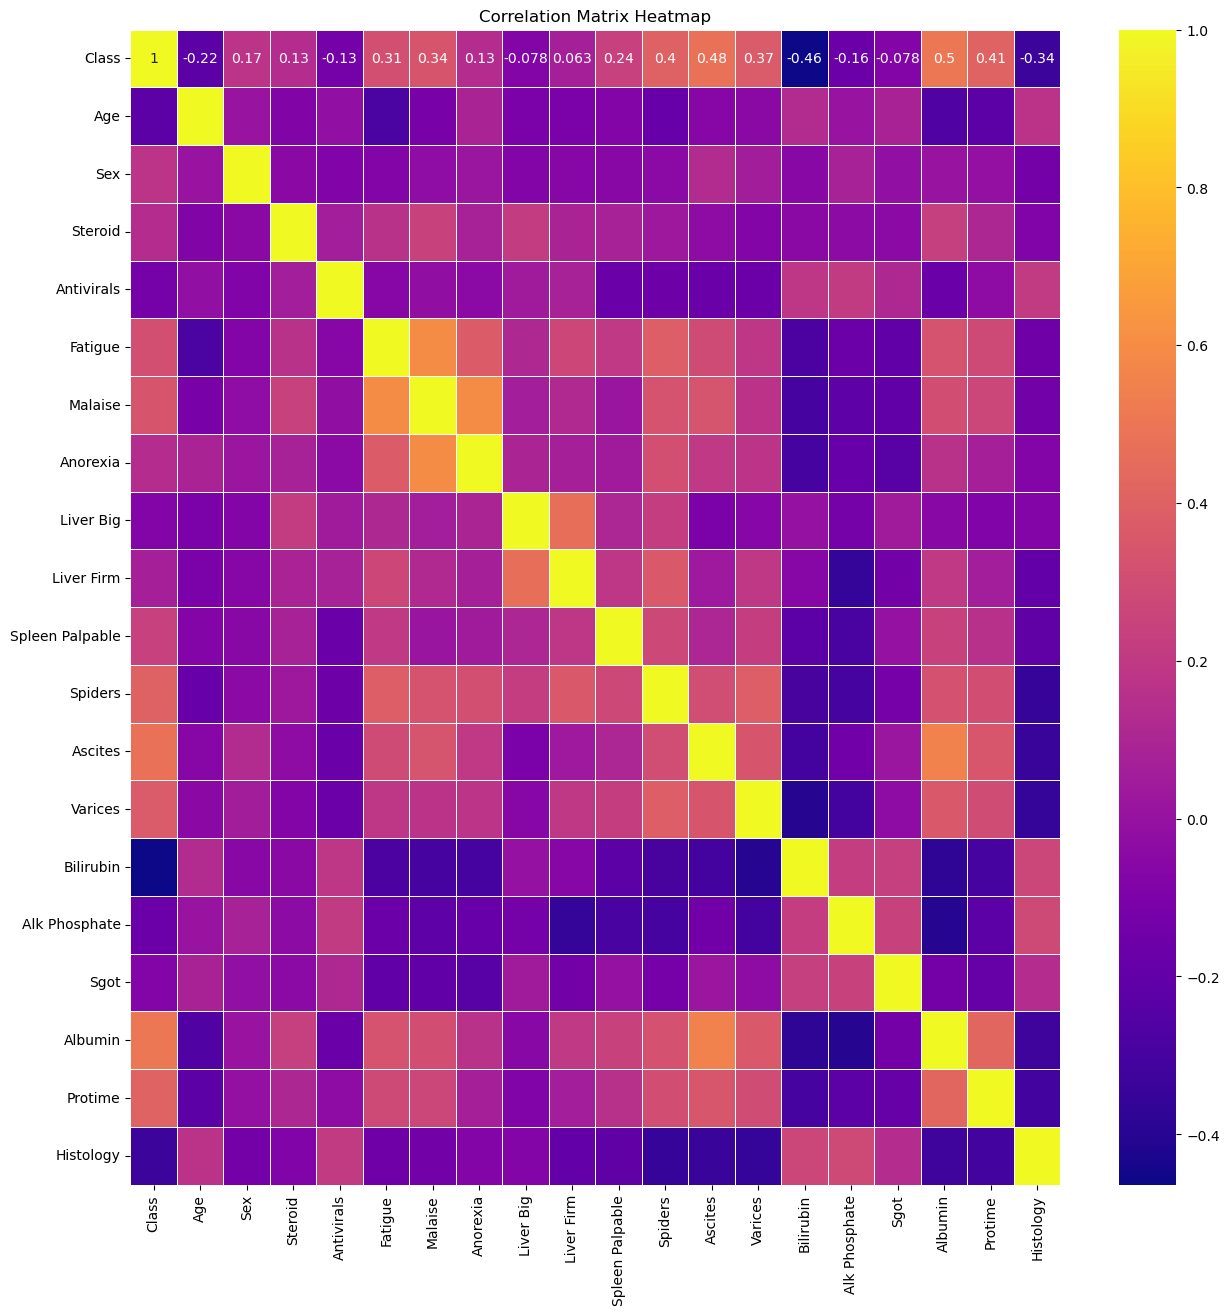

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = df.corr()
plt.figure(figsize=(15, 15))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='plasma', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [8]:
df = df.dropna(subset = df.columns[df.isna().sum() <= 5])
print(df.isna().sum())
print(df.shape)

Class               0
Age                 0
Sex                 0
Steroid             0
Antivirals          0
Fatigue             0
Malaise             0
Anorexia            0
Liver Big           5
Liver Firm          6
Spleen Palpable     0
Spiders             0
Ascites             0
Varices             0
Bilirubin           3
Alk Phosphate      25
Sgot                0
Albumin            12
Protime            60
Histology           0
dtype: int64
(146, 20)


In [9]:
categorical_columns = hepatitis.variables [hepatitis.variables ['type'] == 'Categorical']['name'].tolist()

print(categorical_columns)
for column in categorical_columns:
    most_frequent = df[column].mode()[0]  # Get the most frequent value
    df.loc[:, column] = df[column].fillna(most_frequent)

print(df.isna().sum())
print(df.shape)

['Class', 'Sex', 'Steroid', 'Antivirals', 'Fatigue', 'Malaise', 'Anorexia', 'Liver Big', 'Liver Firm', 'Spleen Palpable', 'Spiders', 'Ascites', 'Varices']
Class               0
Age                 0
Sex                 0
Steroid             0
Antivirals          0
Fatigue             0
Malaise             0
Anorexia            0
Liver Big           0
Liver Firm          0
Spleen Palpable     0
Spiders             0
Ascites             0
Varices             0
Bilirubin           3
Alk Phosphate      25
Sgot                0
Albumin            12
Protime            60
Histology           0
dtype: int64
(146, 20)


In [10]:
int_columns = hepatitis.variables [hepatitis.variables ['type'].isin(['Integer', 'Continuous'])]['name'].tolist()

print(int_columns)
for column in int_columns:
    avg = df[column].median()
    df.loc[:, column] = df[column].fillna(avg)

print(df.isna().sum())
print(df.shape)

['Age', 'Bilirubin', 'Alk Phosphate', 'Sgot', 'Albumin', 'Protime', 'Histology']
Class              0
Age                0
Sex                0
Steroid            0
Antivirals         0
Fatigue            0
Malaise            0
Anorexia           0
Liver Big          0
Liver Firm         0
Spleen Palpable    0
Spiders            0
Ascites            0
Varices            0
Bilirubin          0
Alk Phosphate      0
Sgot               0
Albumin            0
Protime            0
Histology          0
dtype: int64
(146, 20)


### Exploring the Data
Based on the following histograms, it does not seem like many of the variables have a normal distribution. There is a clear common value for each feature.

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Bilirubin'}>,
        <Axes: title={'center': 'Alk Phosphate'}>],
       [<Axes: title={'center': 'Sgot'}>,
        <Axes: title={'center': 'Albumin'}>,
        <Axes: title={'center': 'Protime'}>],
       [<Axes: title={'center': 'Histology'}>, <Axes: >, <Axes: >]],
      dtype=object)

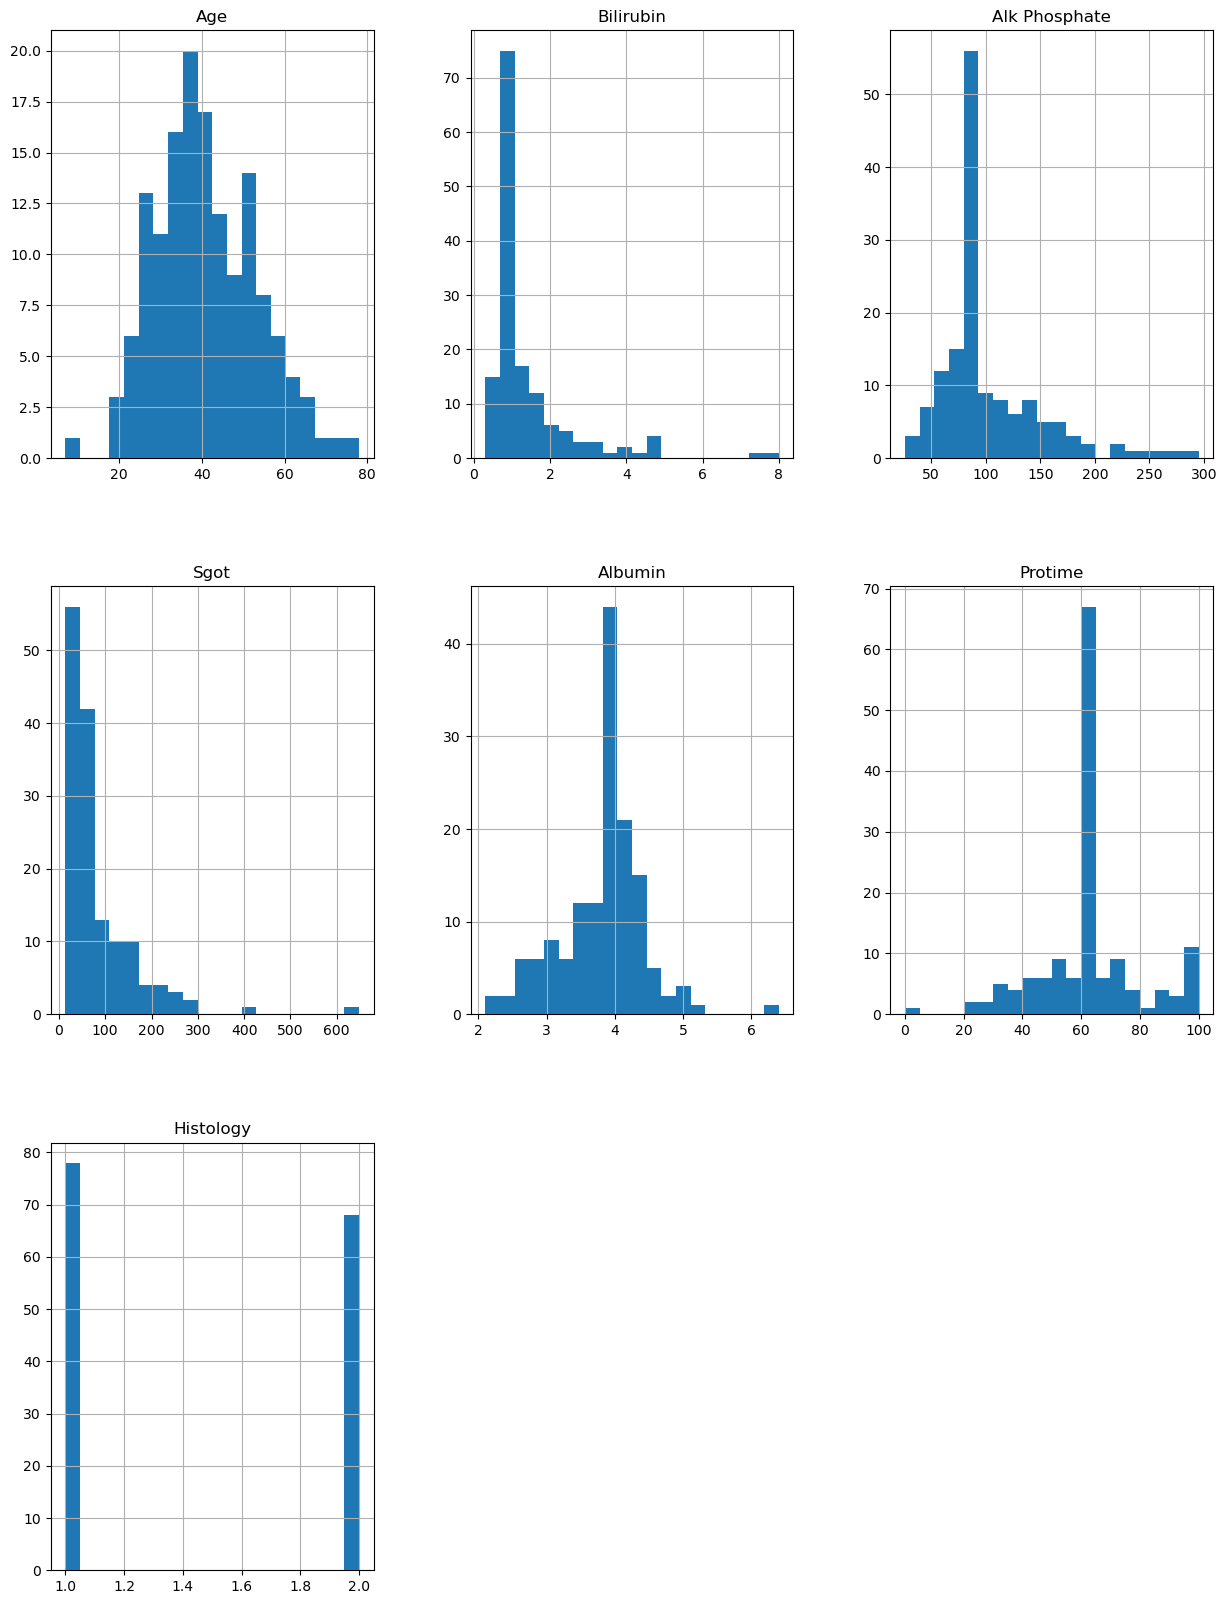

In [11]:
df[int_columns].hist(bins=20, figsize=(15, 20))

### Correlation Matrix
The correlation matrix shows a handful of correlated items, mostly those that could be considered overlapping symptoms. Such as Liver Big and Liver Firm. This could show there is some multicolinearity that could help our analysis.

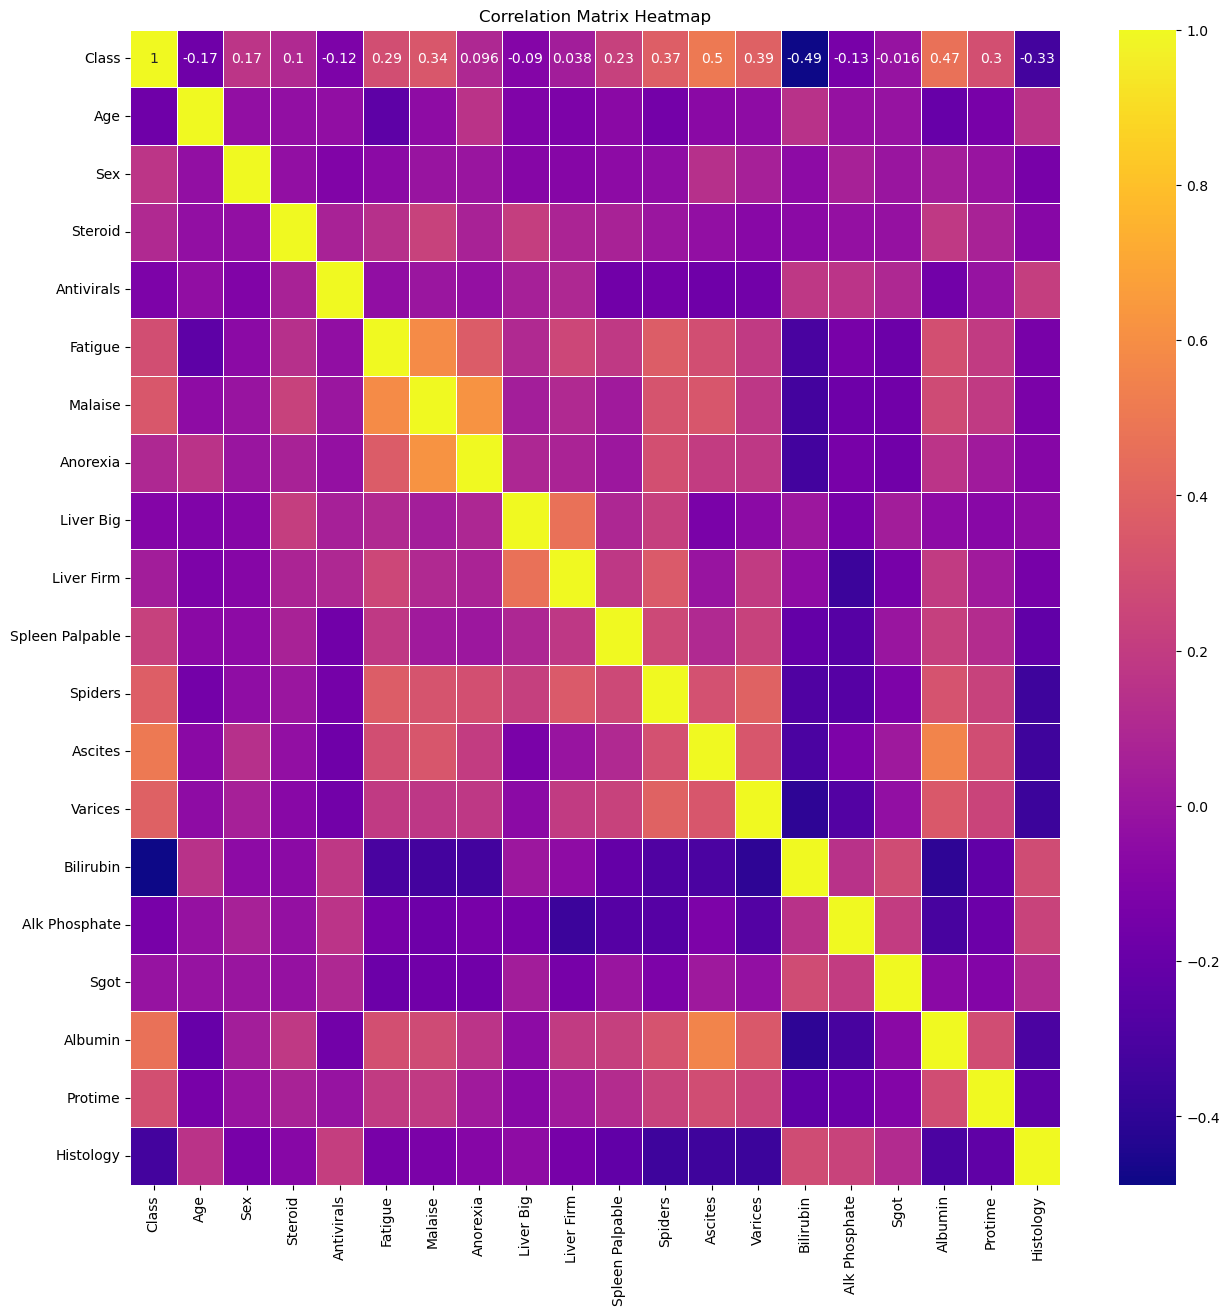

In [12]:
correlation_matrix = df.corr()
plt.figure(figsize=(15, 15))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='plasma', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

### Model Building
I decided to model the problem using 3 different methods:
1. Random Forest. This is a classification problem with a lot of binary features that lend themselves well to decision trees
2. SVC. This works well with smaller datasets and can be useful when there needs to be clear decision boundaries, such as survivability.
3. Logical Regression. This is great at managing multicolinearity and providing probabaliatic outputs.

In [13]:
from sklearn.model_selection import train_test_split
y = df['Class']
X = df.drop('Class', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

rfcaccuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {rfcaccuracy}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7666666666666667

Classification Report:
              precision    recall  f1-score   support

           1       0.43      0.50      0.46         6
           2       0.87      0.83      0.85        24

    accuracy                           0.77        30
   macro avg       0.65      0.67      0.66        30
weighted avg       0.78      0.77      0.77        30



In [15]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', random_state=42)

svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

svcaccuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {svcaccuracy}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8

Classification Report:
              precision    recall  f1-score   support

           1       0.50      0.67      0.57         6
           2       0.91      0.83      0.87        24

    accuracy                           0.80        30
   macro avg       0.70      0.75      0.72        30
weighted avg       0.83      0.80      0.81        30



In [16]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000, random_state=42)

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

lraccuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {lraccuracy}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8333333333333334

Classification Report:
              precision    recall  f1-score   support

           1       0.57      0.67      0.62         6
           2       0.91      0.88      0.89        24

    accuracy                           0.83        30
   macro avg       0.74      0.77      0.75        30
weighted avg       0.84      0.83      0.84        30



In [17]:
print(f"Random Forest Accuracy: {rfcaccuracy}")
print(f"Support Vector Accuracy: {svcaccuracy}")
print(f"Logical Regression Accuracy: {lraccuracy}")

Random Forest Accuracy: 0.7666666666666667
Support Vector Accuracy: 0.8
Logical Regression Accuracy: 0.8333333333333334


### Conclusion
For this particular classification problem, it seems like Logical Regression was the best model. This is a smaller dataset, which is one of the things regression is good for. Although I expected a Random Forest to be able to better handle the binary classification features, it performed the worst out of each model tested. I suspect this was due to the similarities betweeen various clusters of the binary data, such as Liver Big and Liver Firm. This lended itself to being a better multicolinearity problem.